In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

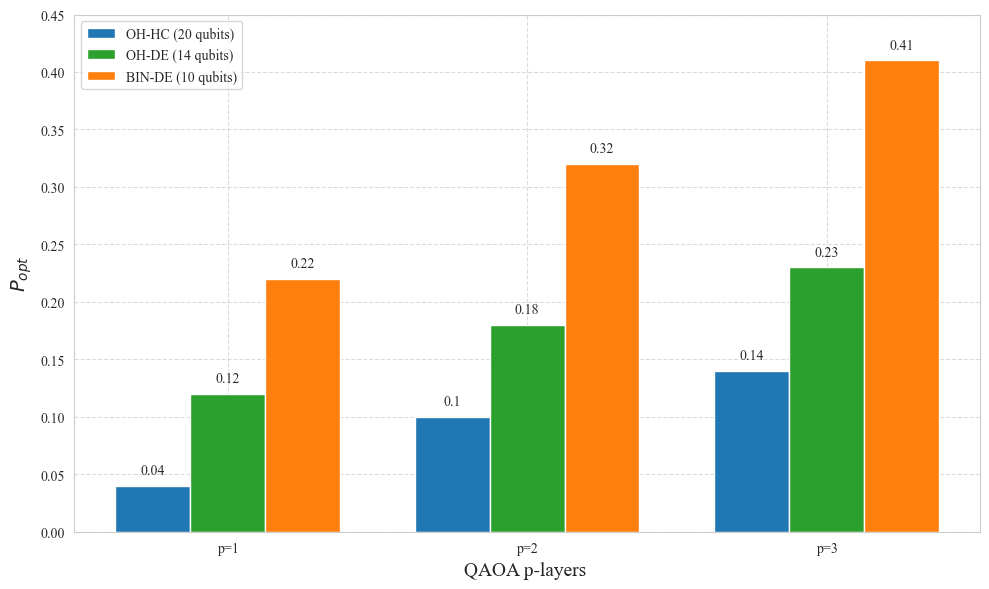

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
plt.rcParams['font.size'] = 10  # Set default font size to 10 pt
plt.rcParams['axes.unicode_minus'] = False  # Fix negative sign display issue
# 数据（试验 1，假设）
p_values = ['p=1', 'p=2', 'p=3']
p_opt_hc = [0.04, 0.10, 0.14]  # One-hot + H_C，20 qubits
p_opt_te = [0.12, 0.18, 0.23]  # One-hot + ~E，14 qubits
p_opt_binary = [0.22, 0.32, 0.41]  # Binary + ~E，10 qubits
qubits = {'OH-HC', 'OH-DE', 'BIN-DE'}

# 图 2：P_opt 对比
plt.figure(figsize=(10, 6))  # 增加高度以容纳标注
x = np.arange(len(p_values))
width = 0.25

# 绘制三组柱形图
bars1 = plt.bar(x - width, p_opt_hc, width, label=r'OH-HC (20 qubits)', color='#1f77b4')
bars2 = plt.bar(x, p_opt_te, width, label=r'OH-DE (14 qubits)', color='#2ca02c')
bars3 = plt.bar(x + width, p_opt_binary, width, label=r'BIN-DE (10 qubits)', color='#ff7f0e')

# 添加 P_opt 数据标签
for i, v in enumerate(p_opt_hc):
    plt.text(i - width, v + 0.01, f'{v}', ha='center', fontsize=10)
for i, v in enumerate(p_opt_te):
    plt.text(i, v + 0.01, f'{v}', ha='center', fontsize=10)
for i, v in enumerate(p_opt_binary):
    plt.text(i + width, v + 0.01, f'{v}', ha='center', fontsize=10)

# 图表设置
# plt.title('图 1：不同方法 $P_{opt}$ 与量子比特数对比', fontsize=12)
plt.xlabel('QAOA p-layers ', fontsize=14)
plt.ylabel(r'$P_{opt}$', fontsize=14)
plt.xticks(x, p_values)
plt.legend()
plt.ylim(0, 0.45)  # 增加 y 轴范围以容纳标注
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 保存并显示
plt.savefig('P_opt.pdf', dpi=1200)
plt.show()

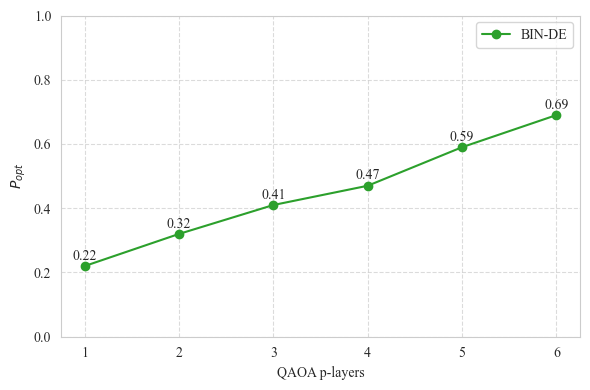

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
plt.rcParams['font.size'] = 10  # Set default font size to 10 pt
plt.rcParams['axes.unicode_minus'] = False  # Fix negative sign display issue
# 数据（试验 4）
p_values = [1, 2, 3, 4, 5, 6]
p_opt = [0.22, 0.32, 0.41, 0.47, 0.59, 0.69]
# e_values = [3.2, 2.6, 2.1]  # 未使用，注释掉

# 图 4a：P_opt 随 p 变化
plt.figure(figsize=(6, 4))
plt.plot(p_values, p_opt, marker='o', linestyle='-', color='#2ca02c', label=r'BIN-DE')
for i, v in enumerate(p_opt):
    plt.text(p_values[i], v + 0.02, str(v), ha='center', fontsize=10)

# 图表设置
# plt.title('图 2：QAOA 层数对 $P_{opt}$ 的影响', fontsize=12)
plt.xlabel('QAOA p-layers', fontsize=10)
plt.ylabel(r'$P_{opt}$', fontsize=10)
plt.ylim(0, 1.0)  # 调整范围以容纳 0.70
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# 保存并显示
plt.savefig('p-layers.pdf', dpi=1200)
plt.show()

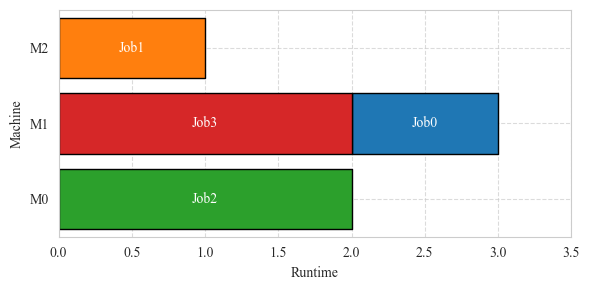

In [5]:
# 实例数据
plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
plt.rcParams['font.size'] = 10  # Set default font size to 10 pt
plt.rcParams['axes.unicode_minus'] = False  # Fix negative sign display issue
instance = {
    'jobs': ['Job0', 'Job1', 'Job2', 'Job3'],
    'machines': [1, 2, 0, 1],  # M2, M3, M1, M2 (索引从 0 开始)
    'start_times': [2, 0, 0, 0],  # 作业 1 在作业 4 后
    'durations': [1, 1, 2, 2],  # P[0][1], P[1][2], P[2][0], P[3][1]
    'C_max': 3
}


def plot_gantt_chart(instance, instance_name, m, fig_num):
    fig, ax = plt.subplots(figsize=(6, 3))
    # 明确生成所有机器的标签
    machines = [f'M{i}' for i in range(m)]
    ax.set_yticks(range(m))  # 设置纵轴刻度，从 0 到 m-1
    ax.set_yticklabels(machines)  # 设置纵轴标签为 M1, M2, M3

    # 定义颜色
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # 绘制每个作业的甘特条
    for i, (job, machine, start, duration) in enumerate(
            zip(instance['jobs'], instance['machines'], instance['start_times'], instance['durations'])):
        ax.broken_barh([(start, duration)], (machine - 0.4, 0.8), facecolors=colors[i % len(colors)],
                       edgecolors='black')
        ax.text(start + duration / 2, machine, job, ha='center', va='center', color='white', fontsize=10)

    # 设置图表范围和标签
    ax.set_xlim(0, instance['C_max'] + 0.5)  # 横轴范围
    ax.set_ylim(-0.5, m - 0.5)  # 纵轴范围，确保显示所有机器
    ax.set_xlabel('Runtime', fontsize=10)
    ax.set_ylabel('Machine', fontsize=10)
    # ax.set_title(fr'图 {fig_num}：{instance_name}的调度方案（$C_{{\max}}$ = {instance["C_max"]}）')
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # 保存并显示
    plt.savefig('gantt.pdf', dpi=800)
    plt.show()


# 生成甘特图，m=3 表示 3 台机器 (M0, M1, M2)
plot_gantt_chart(instance, '实例', m=3, fig_num=8)

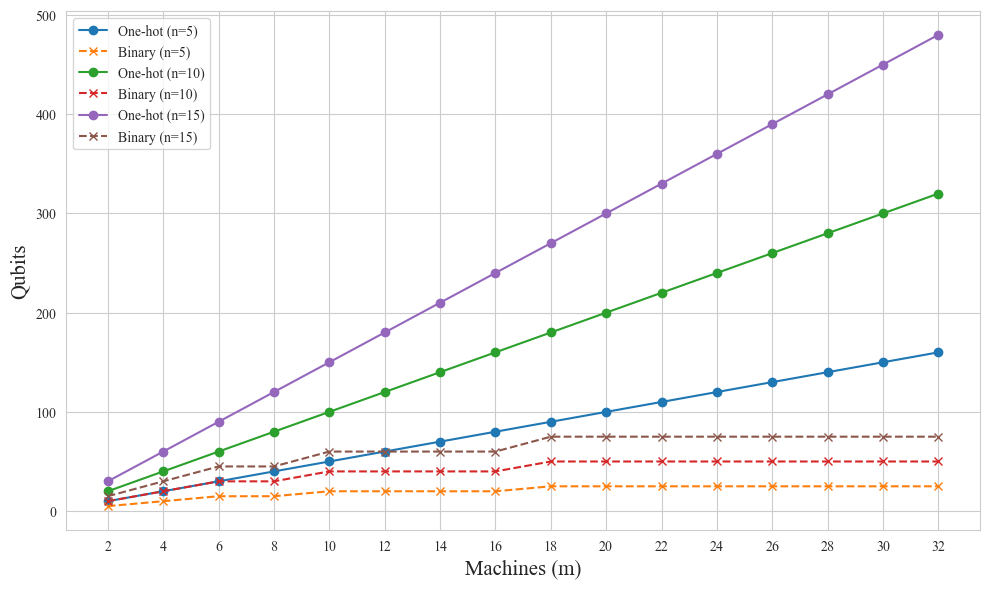

In [13]:
import math

# # 设置 matplotlib 支持中文显示
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# Set matplotlib to use Times New Roman font globally at size 10
plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
plt.rcParams['font.size'] = 10  # Set default font size to 10 pt
plt.rcParams['axes.unicode_minus'] = False  # Fix negative sign display issue
# 定义问题规模参数
n_values = [5, 10, 15]  # 作业数 n 的三种情况
m_range = range(2, 33, 2)  # 机器数 m 从 2 到 32，步长为 2


# 计算不同编码下表示作业分配的量子比特数
def one_hot_assignment_qubits(n, m):
    """计算 one-hot 编码的作业分配量子比特数：n * m"""
    return n * m


def binary_assignment_qubits(n, m):
    """计算二进制编码的作业分配量子比特数：n * N，其中 N = ceil(log2(m))"""
    N = math.ceil(math.log2(m))  # 每个作业所需的二进制位数
    return n * N


# 数据存储和绘图
plt.figure(figsize=(10, 6))  # 设置图形大小
for n in n_values:
    one_hot_qubits = []
    binary_qubits = []
    for m in m_range:
        one_hot_qubits.append(one_hot_assignment_qubits(n, m))
        binary_qubits.append(binary_assignment_qubits(n, m))

    # 绘制曲线
    plt.plot(m_range, one_hot_qubits, label=f'One-hot (n={n})', linestyle='-', marker='o')
    plt.plot(m_range, binary_qubits, label=f'Binary (n={n})', linestyle='--', marker='x')

# 图表设置
plt.xlabel('Machines (m)', fontsize=15)
plt.ylabel('Qubits', fontsize=15)
# plt.title('FOOSP 作业分配量子比特需求：One-hot 与二进制编码对比')
plt.legend()
plt.grid(True)
plt.xticks(list(m_range))  # 显示所有 m 值
plt.tight_layout()

# 显示图形
# 保存并显示
plt.savefig('qubits.pdf', dpi=1200)
plt.show()